# 🪴Lead Score Case Study🪴
<hr/>
<pre/>

<b> (Logistic Regression Model, the Conversion Predictions and Evaluation Metrics)

## 📄Problem Statement📄
<hr/>

- X Education is an organization which provides online courses for industry professional. The company marks its courses on several popular websites like Google.
- X Education wants to select most promising leads that can be converted to paying customers.
- Although the company generates a lot of leads only a few converted into paying customers, wherein the company wants a higher lead conversion. Leads come through numerous modes like email, advertisements on websites, google searches etc.
- The company has had 30% conversion rate through the whole process of turning leads into customers by approaching those leads which are to be found having interest in taking the course. The implementation process of lead generating attributes are not efficient in helping conversions


## ⁂Business Objective⁂
<hr/>

 <font color=green>"The company requires a model to be built for selecting most promising leads.
 Lead score to be given to each leads such that it indicates how promising the lead could be. The higher the lead score the more promising the lead to get converted the lower it is the lesser the chances of conversion." 

 <font color=green>"The model to be built in lead conversion rate around 80% or more."<green/>

### The steps we will follow in this exercise are as follow:
<hr/>

- Reading, understanding and visualizing the data
- Preparing the data for modelling(train-test split, rescaling etc.)
- Training the model
- Model Building & Feature selection using RFE
- Prediction and evaluation on the test set
- Metrics & Plotting ROC Curve
- Finding Cutoff Point & Making Prediction

### Importing necessary liabraries:
<hr/>

In [2]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import all required libraries
import pandas as pd , numpy as np
import matplotlib.pyplot as plt , seaborn as sns
%matplotlib inline

In [4]:
# setting dispaly option
pd.set_option('display.max_columns', 125)
pd.set_option('display.max_rows', 350000)

### 📖Reading and Understanding the Dataset📖
<hr/>


In [5]:
# read the dataset "day.csv" 
Leads_Data = pd.read_csv('Leads.csv')

In [6]:
# print the head of dataframe
Leads_Data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
# print the tail of dataframe
Leads_Data.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [8]:
# Shape of the dataframe
Leads_Data.shape

(9240, 37)

<font color=blue>There are 9240 rows and 37 columns in the dataset.</blue>

In [9]:
# information of dataframe
Leads_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<font color=blue>There are few null values so we have to treat them accordingly and have to create dummy variable for categorical variables.</blue>

In [10]:
# describe of dataframe
Leads_Data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### 🧹Data Cleaning🧹
<hr/>

#### 🧐Cheaking for Null Values🧐


In [11]:
# checking for null values
(Leads_Data.isnull().sum()/9240*100).sort_values(ascending = False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896


<font color=blue>While checking for null values we got to know that the columns has more than 35% of null values so we drop the columns which have more than 35% of null values</blue>

In [12]:
# shape of dataframe before dropping columns
Leads_Data.shape

(9240, 37)

### 💧Dropping Columns💧
<hr/>

In [13]:
# droping column with or more than 40% of null values
Leads_Data = Leads_Data.loc[:,(Leads_Data.isnull().sum()/9240) < 0.35]

In [14]:
# shape of the dataframe after dropping columns
Leads_Data.shape

(9240, 31)

<font color=blue>There are some columns in dataset which are not required for analysis so we can drop that columns</blue>

In [15]:
# dropping unnecessary columns
Unnecessary_Columns = ['City','Country','Prospect ID', 'Lead Number']
Leads_Data.drop(columns = Unnecessary_Columns, inplace = True)

In [16]:
# shape of dataframe after dropping unnecessary column
Leads_Data.shape

(9240, 27)

<font color=blue>There are a few columns in dataset in which there is a level called 'Select' which means that the student had not selected the option for that particular column. These values are as good as missing values and hence we need to find the value counts of the level 'Select' in all the columns in which it is present.</blue>

In [17]:
# value counts of all the columns

for column in Leads_Data:
    print(Leads_Data[column].astype('category').value_counts())
    print('___________________________________________________')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
___________________________________________________
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
___________________________________________________
No     8506
Yes     734
Name: Do Not Email, dtype: int64
___________________________________________________
No     9238
Yes  

Lead Profile, How did you hear about X Education and Specialization column has level 'Select' 

In [18]:
# value count of column Lead profile
Leads_Data['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [19]:
# value count of column How did you hear about X Education 
Leads_Data['How did you hear about X Education'].astype('category').value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [20]:
# value count of column specialization
Leads_Data['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

<font color=blue>Lead Profile and How did you hear about X Education have lot number of select which is of no use so we drop the column</blue>

In [21]:
# dropping the column Lead Profile and How did you hear about X Education 
Leads_Data.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

<font color=blue>From the above analysis we saw that there are some columns which have only one value i.e. NO and there are also some columns which have very less count of value 'Yes' which are of no use for analysis so its better to drop them</blue>

<font color=blue>Columns that we have to drop are Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque</blue>

In [22]:
# dropping columns which have only one value 
Leads_Data.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

There is also a variable 'What matters most to you in choosing a course' which has the level Better Career Prospects 6528 times while the other two levels appear two and one times respectively. So we should drop this column.

In [23]:
# dropping column 'What matters most to you in choosing a course'
Leads_Data.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [24]:
# shape of dataframe after dropping columns
Leads_Data.shape

(9240, 12)

In [25]:
# again check for null values
Leads_Data.isnull().sum().sort_values(ascending = False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

<font color=blue>Still there are some columns with null values so now we drop rows with null values instead of dropping columns</blue>

In [26]:
# dropping rows with null values of column 
lst = ['What is your current occupation', 'Specialization', 'TotalVisits', 'Lead Source']
for ele in lst:
    Leads_Data = Leads_Data[~pd.isnull(Leads_Data[ele])]

In [27]:
# again check for null values
Leads_Data.isnull().sum().sort_values(ascending = False)

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Now there are no null values in any column

In [28]:
# info of the dataframe
Leads_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   obje

In [29]:
# head of dataframe
Leads_Data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


### 📊Performing EDA on Data💹
<hr/>


##### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

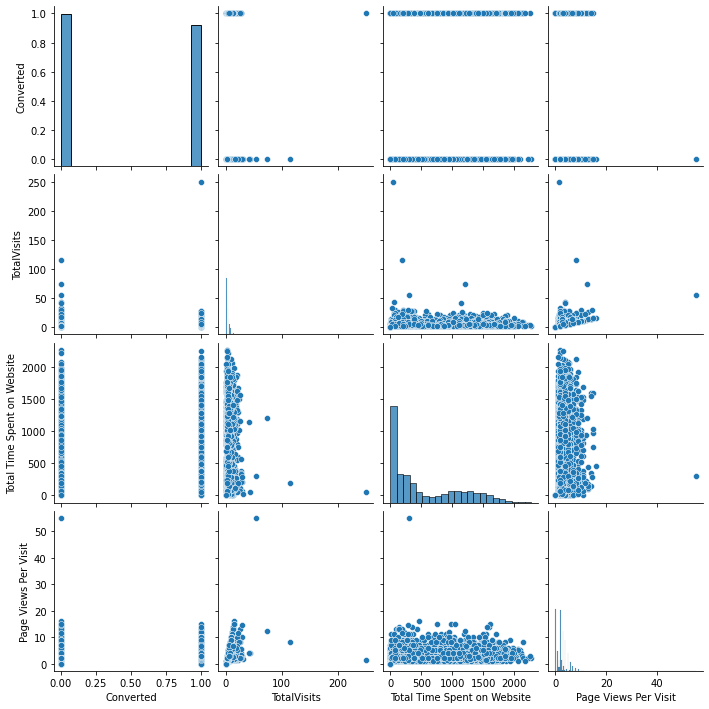

In [30]:
# plotting pairplot
sns.pairplot(Leads_Data)
plt.show()

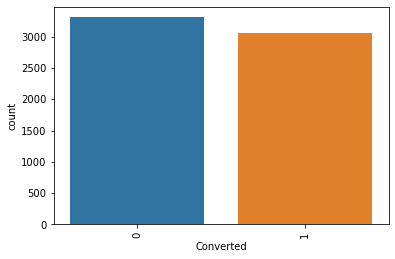

In [31]:
# plotting countplot for 'Converted'
sns.countplot(Leads_Data['Converted'])
plt.xticks(rotation = 90)
plt.show()

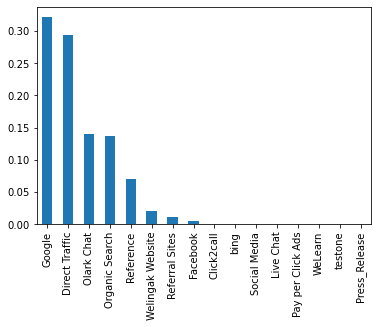

In [32]:
# plotting bar graph for 'Lead Source'
Leads_Data["Lead Source"].value_counts(normalize = True).plot.bar()
plt.show()

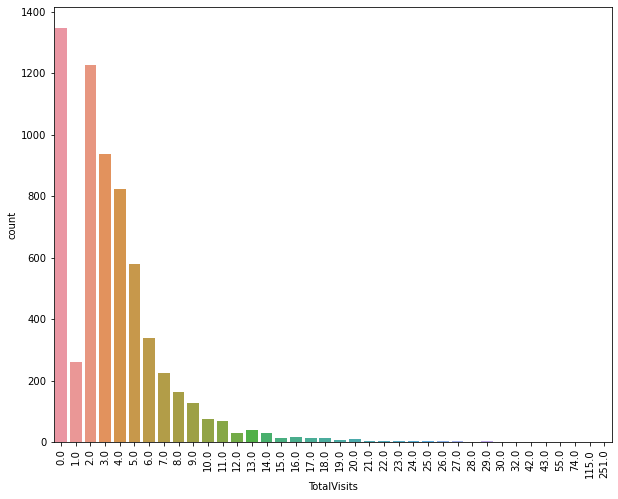

In [33]:
# plotting countplot for 'TotalVisits'
plt.figure(figsize=(10,8))
sns.countplot(Leads_Data['TotalVisits'])
plt.xticks(rotation = 90)
plt.show()

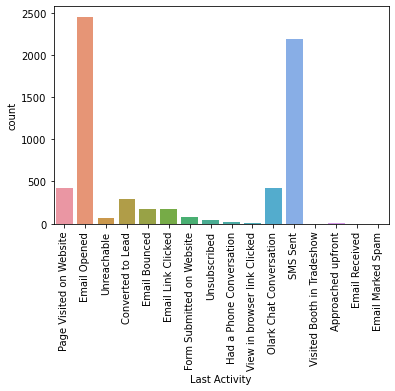

In [34]:
# plotting countplot for 'Last Activity'
sns.countplot(Leads_Data['Last Activity'])
plt.xticks(rotation = 90)
plt.show()

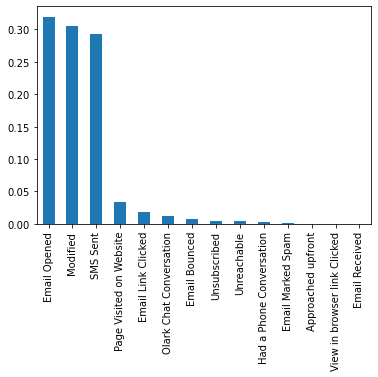

In [35]:
# plotting bar graph for 'Last Notable Activity'
Leads_Data["Last Notable Activity"].value_counts(normalize = True).plot.bar()
plt.show()

#### Visualising Categorical Variables

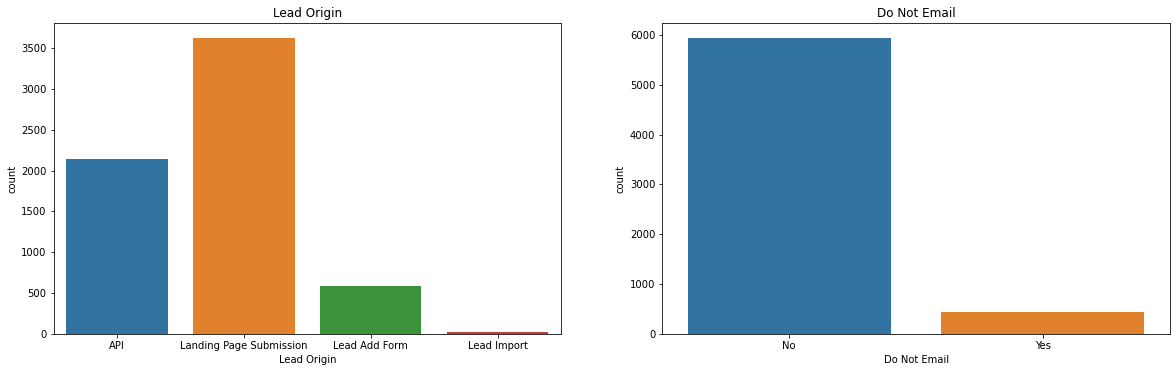

In [36]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(Leads_Data['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(Leads_Data['Do Not Email'])
plt.title('Do Not Email')

plt.show()

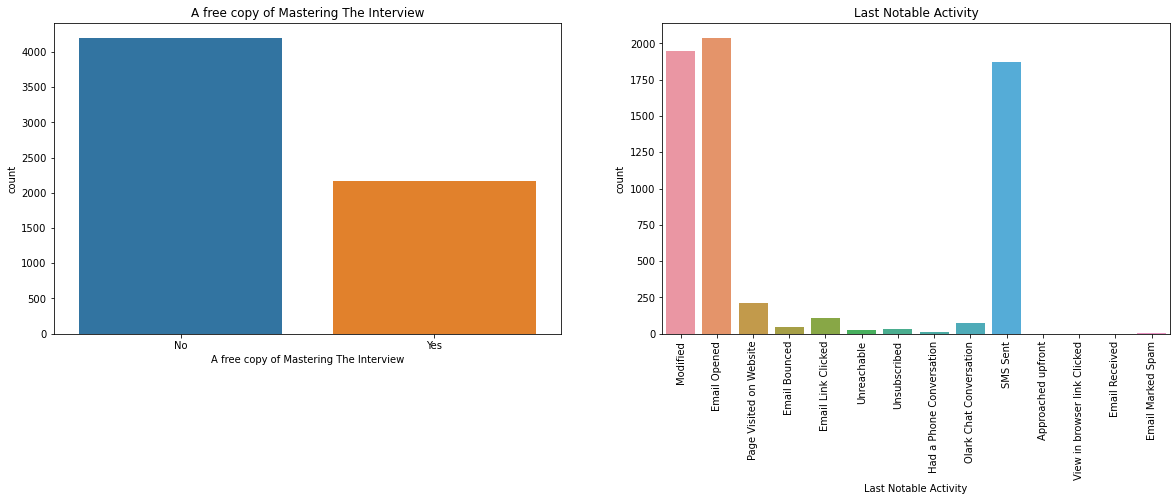

In [37]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,11)
sns.countplot(Leads_Data['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(Leads_Data['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

### 📃Data Preparation📃
<hr/>
<pre/>

Converting some binary variables (Yes/No) to 0/1

In [38]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the Leads list
Leads_Data[varlist] = Leads_Data[varlist].apply(binary_map)

In [39]:
Leads_Data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,0,Modified


### ❄️Dummy Variable Creation❄️
<hr/>

In [40]:
# Checking for categorical variable
Cat_Var = Leads_Data.loc[:, Leads_Data.dtypes == 'object']
Cat_Var.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [41]:
# creating dummy varaible
Dummy = pd.get_dummies(Leads_Data[['Lead Origin', 'Lead Source', 'Last Activity',
                              'What is your current occupation', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
Leads_Data = pd.concat([Leads_Data, Dummy], axis=1)

In [42]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is of no use so we
# drop that level by specifying it explicitly

Dummy_1 = pd.get_dummies(Leads_Data['Specialization'], prefix = 'Specialization')
Dummy_1 = Dummy_1.drop(['Specialization_Select'], 1)
Leads_Data = pd.concat([Leads_Data, Dummy_1], axis = 1)

In [43]:
# We have created dummies for the below variables, so we can drop them
Leads_Data = Leads_Data.drop(['Lead Origin', 'Lead Source', 'Last Activity',
                              'What is your current occupation', 
                              'Last Notable Activity', 'Specialization'], 1)

In [44]:
# shape of the dataframe
Leads_Data.shape

(6373, 75)

In [45]:
# head of the Dataframe
Leads_Data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
# info of the dataframe
Leads_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 75 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6373 non-null   int64  
 1   Converted                                             6373 non-null   int64  
 2   TotalVisits                                           6373 non-null   float64
 3   Total Time Spent on Website                           6373 non-null   int64  
 4   Page Views Per Visit                                  6373 non-null   float64
 5   A free copy of Mastering The Interview                6373 non-null   int64  
 6   Lead Origin_Landing Page Submission                   6373 non-null   uint8  
 7   Lead Origin_Lead Add Form                             6373 non-null   uint8  
 8   Lead Origin_Lead Import                               6373

<font color=blue>Now you can see that you have all variables as numeric.</blue>

### ❕Checking Outliers❕
<hr/>

In [47]:
# Checking for outliers in the continuous variables
Num_Leads = Leads_Data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [48]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
Num_Leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6373.000000,6373.000000,6373.000000
mean,3.624196,535.224541,2.480464
std,5.048555,565.374753,2.167364
min,0.000000,0.000000,0.000000
25%,1.000000,34.000000,1.000000
50%,3.000000,287.000000,2.000000
75%,5.000000,1022.000000,3.500000
90%,8.000000,1428.800000,5.000000
95%,10.000000,1592.400000,6.000000
99%,18.000000,1849.280000,9.000000


<font color=blue>From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.</blue>

In [49]:
# Checking of missing values
round(100*(Leads_Data.isnull().sum()/len(Leads_Data.index)), 2)

Do Not Email                                            0.0
Converted                                               0.0
TotalVisits                                             0.0
Total Time Spent on Website                             0.0
Page Views Per Visit                                    0.0
A free copy of Mastering The Interview                  0.0
Lead Origin_Landing Page Submission                     0.0
Lead Origin_Lead Add Form                               0.0
Lead Origin_Lead Import                                 0.0
Lead Source_Direct Traffic                              0.0
Lead Source_Facebook                                    0.0
Lead Source_Google                                      0.0
Lead Source_Live Chat                                   0.0
Lead Source_Olark Chat                                  0.0
Lead Source_Organic Search                              0.0
Lead Source_Pay per Click Ads                           0.0
Lead Source_Press_Release               

<font color=blue>**There is no missing values**</blue>

## 🪓Splitting the Data into Training and Testing Sets🪓
<hr/>
<pre/>

As you know, the first basic step for regression is performing a train-test split.

In [50]:
# Import the required library
from sklearn.model_selection import train_test_split

In [51]:
# Putting feature variable to X
X = Leads_Data.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
# Putting response variable to y
y = Leads_Data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [53]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 🪶Feature Scaling🪶
<hr/>
<pre/>

There are a few numeric variables present in the dataset which have different scales. So we have to scale those variables

In [54]:
# Import the required library
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0,0.064874,-0.824395,-0.223652,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
218,0,0.064874,-0.611929,0.753710,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4171,0,0.431907,-0.804919,1.731071,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4037,0,-0.669191,-0.943022,-1.201013,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3660,0,-0.669191,-0.943022,-1.201013,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


<font color=blue>Clearly, none of the variables will have a disproportionate effect on the model’s results now.</blue>

In [56]:
# Checking the Conversion Rate
converted = (sum(Leads_Data['Converted'])/len(Leads_Data['Converted'].index))*100
converted

48.093519535540565

<font color=blue>**We have 48% conversion rate**</blue>

##  🌽Looking at Correlations🌽
<hr/>

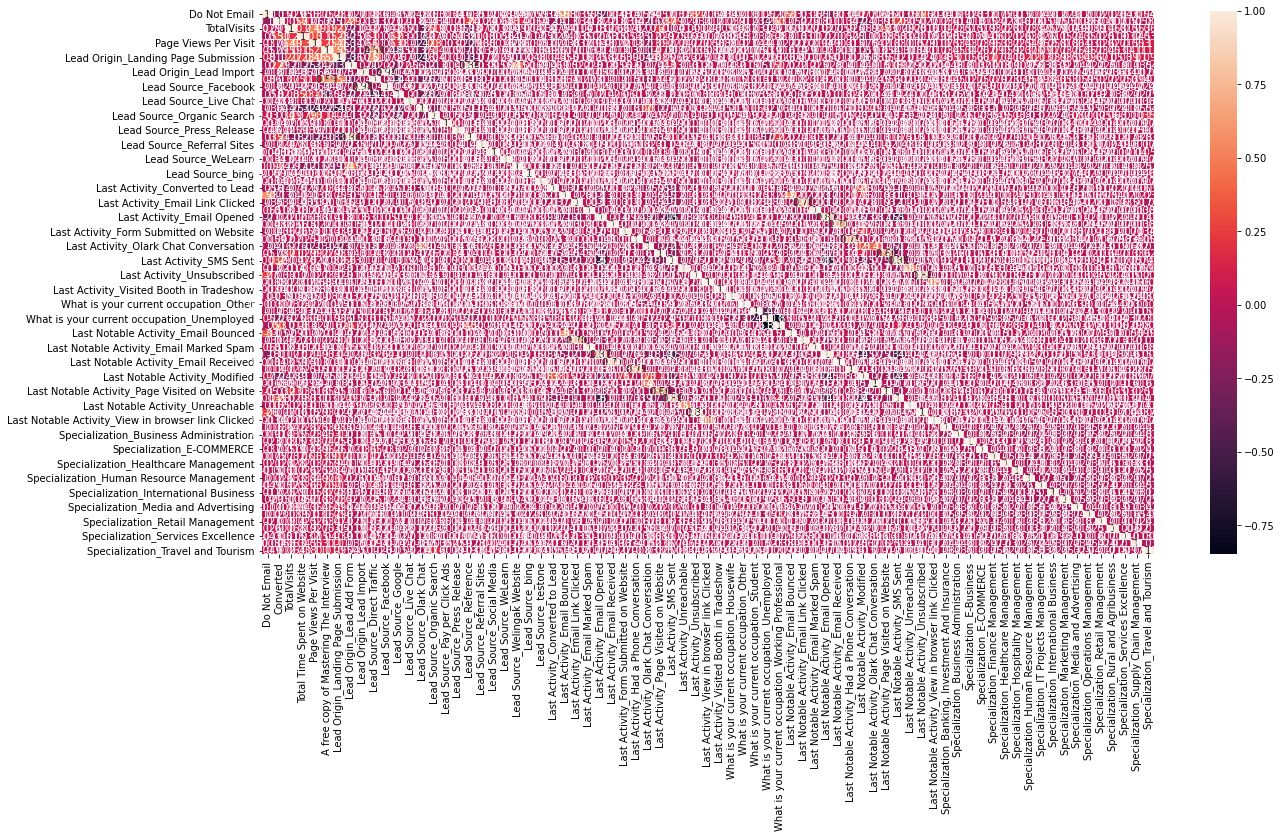

In [57]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Leads_Data.corr(),annot = True)
plt.show()

##### Since there are a lot of variables it is difficult to drop variable

## 🗂️Model Building🗂️
<hr/>

In [58]:
# importing required library
import statsmodels.api as sm

In [59]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4392
Model Family:                Binomial   Df Model:                           68
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 19 May 2023   Deviance:                   1.1191e+05
Time:                        21:27:17   Pearson chi2:                 5.47e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -2.171e+15   8.85e+07  -2.45e+07      0.000   -2.17e+15   -2.17e+15
Do Not Email                                         -8.857e+14   5.42e+06  -1.63e+08      0.000   -8.86e+14   -8.86e+14
TotalVisits                                           7.809e+13   1.17e+06   6.66e+07      0.000    7.81e+13    7.81e+13
Total Time Spent on Website                           2.553e+14   1.16e+06    2.2e+08      0.000    2.55e+14    2.55e+14
Page Views Per Visit                                   3.47e+13   1.48e+06   2.35e+07      0.000    3.47e+13    3.47e+13
A free copy of Mastering The Interview                7.445e+13   3.09e+06   2.41e+07      0.000    7.44e+13    7.44e+13
Lead Origin_Landing Page Submission                  -9.893e+14   3.81e+06   -2.6e+08      0.000   -9.89e+14   -9.89e+14
Lead Origin_Lead Add Form                             4.761e+15   4.77e+07   9.99e+07      0.000    4.76e+15    4.76e+15
Lead Origin_Lead Import                               4.741e+15   4.21e+07   1.13e+08      0.000    4.74e+15    4.74e+15
Lead Source_Direct Traffic                            8.766e+15   8.26e+07   1.06e+08      0.000    8.77e+15    8.77e+15
Lead Source_Facebook                                  4.741e+15   4.21e+07   1.13e+08      0.000    4.74e+15    4.74e+15
Lead Source_Google                                    8.618e+15   8.25e+07   1.04e+08      0.000    8.62e+15    8.62e+15
Lead Source_Live Chat                                 7.972e+15   8.24e+07   9.67e+07      0.000    7.97e+15    7.97e+15
Lead Source_Olark Chat                                8.689e+15   8.25e+07   1.05e+08      0.000    8.69e+15    8.69e+15
Lead Source_Organic Search                            8.594e+15   8.26e+07   1.04e+08      0.000    8.59e+15    8.59e+15
Lead Source_Pay per Click Ads                         9.832e+15   1.06e+08   9.24e+07      0.000    9.83e+15    9.83e+15
Lead Source_Press_Release                             1.032e+16   1.07e+08   9.64e+07      0.000    1.03e+16    1.03e+16
Lead Source_Reference                                 4.698e+15   6.74e+07   6.97e+07      0.000     4.7e+15     4.7e+15
Lead Source_Referral Sites                             8.25e+15   8.31e+07   9.93e+07      0.000    8.25e+15    8.25e+15
Lead Source_Social Media                              -212.4481      2e-06  -1.06e+08      0.000    -212.448    -212.448
Lead Source_WeLearn                                   1.363e+16   1.06e+08   1.28e+08      0.000    1.36e+16    1.36e+16
Lead Source_Welingak Website                          5.238e+15   6.77e+07   7.74e+07      0.000    5.24e+15    5.24e+15
Lead Source_bing                                      5.29

## 🫧Feature Selection Using RFE🫧
<hr/>

In [60]:
# importing required library
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [61]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [62]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False,  True, False,  True,  True,  True, False, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [63]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 41),
 ('A free copy of Mastering The Interview', False, 46),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 56),
 ('Lead Source_Direct Traffic', False, 25),
 ('Lead Source_Facebook', False, 53),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Live Chat', False, 45),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Pay per Click Ads', False, 42),
 ('Lead Source_Press_Release', False, 55),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Social Media', False, 59),
 ('Lead Source_WeLearn', False, 38),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 27),
 ('Lead Source_testone', False, 37),
 ('Last Activity_Converted to Lead', False, 22),
 ('Last Activity_Em

In [64]:
col = X_train.columns[rfe.support_]

In [65]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_testone', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser lin

# <font color=brown>**Assessing the model with StatsModels**</brown>
<hr/>
<pre/>

### <font color=green>Model - 1</grren>

In [66]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
# Selected columns for Model 1 - all columns selected by RFE
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2038.7
Date:                Fri, 19 May 2023   Deviance:                       4077.4
Time:                        21:27:22   Pearson chi2:                 4.69e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3756
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6583      0.602      1.094      0.274      -0.521       1.838
Do Not Email                                            -1.4166      0.193     -7.327      0.000      -1.795      -1.038
Total Time Spent on Website                              1.0948      0.046     23.674      0.000       1.004       1.185
Lead Origin_Lead Add Form                                2.8029      1.219      2.299      0.022       0.413       5.193
Lead Source_Olark Chat                                   1.2977      0.114     11.342      0.000       1.073       1.522
Lead Source_Reference                                    1.2756      1.243      1.026      0.305      -1.161       3.712
Lead Source_Welingak Website                             3.2908      1.580      2.082      0.037       0.193       6.388
Last Activity_Had a Phone Conversation                   1.6253      0.984      1.652      0.099      -0.304       3.554
Last Activity_SMS Sent                                   0.9927      0.084     11.771      0.000       0.827       1.158
What is your current occupation_Housewife               22.4128   2.39e+04      0.001      0.999   -4.69e+04    4.69e+04
What is your current occupation_Student                 -1.3322      0.639     -2.085      0.037      -2.585      -0.080
What is your current occupation_Unemployed              -1.4578      0.603     -2.418      0.016      -2.639      -0.276
What is your current occupation_Working Professional     1.1501      0.632      1.820      0.069      -0.088       2.389
Last Notable Activity_Had a Phone Conversation          22.4823   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Modified                          -0.8433      0.090     -9.400      0.000      -1.019      -0.667
Last Notable Activity_Unreachable                        2.4696      0.807      3.061      0.002       0.888       4.051
========================================================================================================================
"""

In [68]:
# checking for vif
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.15
4,Lead Source_Reference,65.19
5,Lead Source_Welingak Website,20.03
6,Last Activity_Had a Phone Conversation,2.45
12,Last Notable Activity_Had a Phone Conversation,2.44
10,What is your current occupation_Unemployed,2.43
7,Last Activity_SMS Sent,1.68
13,Last Notable Activity_Modified,1.57
3,Lead Source_Olark Chat,1.37
11,What is your current occupation_Working Profes...,1.31


In [69]:
# Dropping the variable Lead Origin_Lead Add Form as it is insignificant as it has high VIF.
col = col.drop('Lead Origin_Lead Add Form', 1)

### <font color=green>Model - 2</green>

In [70]:
# model after dropping Lead Origin_Lead Add Form 

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2041.9
Date:                Fri, 19 May 2023   Deviance:                       4083.8
Time:                        21:27:22   Pearson chi2:                 4.69e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3747
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6598      0.601      1.097      0.273      -0.519       1.838
Do Not Email                                            -1.4199      0.193     -7.351      0.000      -1.798      -1.041
Total Time Spent on Website                              1.0899      0.046     23.645      0.000       1.000       1.180
Lead Source_Olark Chat                                   1.2892      0.114     11.295      0.000       1.065       1.513
Lead Source_Reference                                    4.0685      0.262     15.552      0.000       3.556       4.581
Lead Source_Welingak Website                             6.0835      1.010      6.021      0.000       4.103       8.064
Last Activity_Had a Phone Conversation                   1.6209      0.983      1.648      0.099      -0.306       3.548
Last Activity_SMS Sent                                   0.9945      0.084     11.802      0.000       0.829       1.160
What is your current occupation_Housewife               22.4116   2.39e+04      0.001      0.999   -4.69e+04    4.69e+04
What is your current occupation_Student                 -1.3315      0.639     -2.085      0.037      -2.583      -0.080
What is your current occupation_Unemployed              -1.4541      0.602     -2.414      0.016      -2.635      -0.273
What is your current occupation_Working Professional     1.1489      0.631      1.819      0.069      -0.089       2.387
Last Notable Activity_Had a Phone Conversation          22.4799   2.08e+04      0.001      0.999   -4.08e+04    4.09e+04
Last Notable Activity_Modified                          -0.8423      0.090     -9.399      0.000      -1.018      -0.667
Last Notable Activity_Unreachable                        2.4634      0.807      3.054      0.002       0.883       4.044
========================================================================================================================
"""

In [71]:
# checking for vif
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_Had a Phone Conversation,2.45
11,Last Notable Activity_Had a Phone Conversation,2.44
9,What is your current occupation_Unemployed,2.43
6,Last Activity_SMS Sent,1.68
12,Last Notable Activity_Modified,1.57
2,Lead Source_Olark Chat,1.37
10,What is your current occupation_Working Profes...,1.31
1,Total Time Spent on Website,1.28
3,Lead Source_Reference,1.28
0,Do Not Email,1.09


In [72]:
# Dropping the variable What is your current occupation_Housewife as it is insignificant as it has high p-value.
col = col.drop('What is your current occupation_Housewife', 1)

### <font color=green>Model - 3</green>

In [73]:
# model after dropping What is your current occupation_Housewife 

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2043.9
Date:                Fri, 19 May 2023   Deviance:                       4087.9
Time:                        21:27:23   Pearson chi2:                 4.69e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3741
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1835      0.552      2.143      0.032       0.101       2.266
Do Not Email                                            -1.4240      0.193     -7.362      0.000      -1.803      -1.045
Total Time Spent on Website                              1.0896      0.046     23.642      0.000       0.999       1.180
Lead Source_Olark Chat                                   1.2877      0.114     11.281      0.000       1.064       1.511
Lead Source_Reference                                    4.0682      0.262     15.554      0.000       3.556       4.581
Lead Source_Welingak Website                             6.0833      1.010      6.020      0.000       4.103       8.064
Last Activity_Had a Phone Conversation                   1.6196      0.983      1.647      0.100      -0.308       3.547
Last Activity_SMS Sent                                   0.9948      0.084     11.807      0.000       0.830       1.160
What is your current occupation_Student                 -1.8551      0.593     -3.130      0.002      -3.017      -0.693
What is your current occupation_Unemployed              -1.9778      0.554     -3.573      0.000      -3.063      -0.893
What is your current occupation_Working Professional     0.6251      0.585      1.069      0.285      -0.521       1.771
Last Notable Activity_Had a Phone Conversation          21.4812   1.26e+04      0.002      0.999   -2.47e+04    2.48e+04
Last Notable Activity_Modified                          -0.8408      0.090     -9.391      0.000      -1.016      -0.665
Last Notable Activity_Unreachable                        2.4619      0.807      3.051      0.002       0.881       4.043
========================================================================================================================
"""

In [74]:
# checking for vif
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_Had a Phone Conversation,2.45
10,Last Notable Activity_Had a Phone Conversation,2.44
8,What is your current occupation_Unemployed,2.43
6,Last Activity_SMS Sent,1.68
11,Last Notable Activity_Modified,1.57
2,Lead Source_Olark Chat,1.37
9,What is your current occupation_Working Profes...,1.31
1,Total Time Spent on Website,1.28
3,Lead Source_Reference,1.28
0,Do Not Email,1.09


In [75]:
# Dropping the variable Last Notable Activity_Had a Phone Conversation as it is insignificant as it has high p-value.
col = col.drop('Last Notable Activity_Had a Phone Conversation', 1)

### <font color=green>Model - 4</green>

In [76]:
# model after dropping Last Notable Activity_Had a Phone Conversation

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2045.9
Date:                Fri, 19 May 2023   Deviance:                       4091.9
Time:                        21:27:23   Pearson chi2:                 4.69e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3736
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1870      0.552      2.149      0.032       0.105       2.269
Do Not Email                                            -1.4235      0.193     -7.360      0.000      -1.803      -1.044
Total Time Spent on Website                              1.0882      0.046     23.621      0.000       0.998       1.178
Lead Source_Olark Chat                                   1.2865      0.114     11.271      0.000       1.063       1.510
Lead Source_Reference                                    4.0679      0.262     15.550      0.000       3.555       4.581
Lead Source_Welingak Website                             6.0819      1.010      6.019      0.000       4.102       8.062
Last Activity_Had a Phone Conversation                   2.8848      0.799      3.613      0.000       1.320       4.450
Last Activity_SMS Sent                                   0.9930      0.084     11.789      0.000       0.828       1.158
What is your current occupation_Student                 -1.8559      0.593     -3.131      0.002      -3.018      -0.694
What is your current occupation_Unemployed              -1.9780      0.554     -3.573      0.000      -3.063      -0.893
What is your current occupation_Working Professional     0.6236      0.585      1.066      0.286      -0.523       1.770
Last Notable Activity_Modified                          -0.8496      0.089     -9.498      0.000      -1.025      -0.674
Last Notable Activity_Unreachable                        2.4582      0.807      3.047      0.002       0.877       4.039
========================================================================================================================
"""

In [77]:
# checking for vif
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,2.42
6,Last Activity_SMS Sent,1.68
10,Last Notable Activity_Modified,1.56
2,Lead Source_Olark Chat,1.37
9,What is your current occupation_Working Profes...,1.31
1,Total Time Spent on Website,1.28
3,Lead Source_Reference,1.28
0,Do Not Email,1.09
4,Lead Source_Welingak Website,1.07
7,What is your current occupation_Student,1.04


In [78]:
# Dropping the variable What is your current occupation_Working Professional as it is insignificant as it has high p-value.
col = col.drop('What is your current occupation_Working Professional', 1)

### <font color=green>Model - 5</green>

In [79]:
# model after dropping What is your current occupation_Working Professional

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2046.5
Date:                Fri, 19 May 2023   Deviance:                       4092.9
Time:                        21:27:23   Pearson chi2:                 4.67e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3734
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.7485      0.188      9.294      0.000       1.380       2.117
Do Not Email                                  -1.4225      0.193     -7.354      0.000      -1.802      -1.043
Total Time Spent on Website                    1.0883      0.046     23.620      0.000       0.998       1.179
Lead Source_Olark Chat                         1.2880      0.114     11.286      0.000       1.064       1.512
Lead Source_Reference                          4.0695      0.262     15.557      0.000       3.557       4.582
Lead Source_Welingak Website                   6.0818      1.010      6.019      0.000       4.101       8.062
Last Activity_Had a Phone Conversation         2.8873      0.798      3.616      0.000       1.323       4.452
Last Activity_SMS Sent                         0.9961      0.084     11.838      0.000       0.831       1.161
What is your current occupation_Student       -2.4183      0.284     -8.508      0.000      -2.975      -1.861
What is your current occupation_Unemployed    -2.5409      0.188    -13.515      0.000      -2.909      -2.172
Last Notable Activity_Modified                -0.8498      0.089     -9.499      0.000      -1.025      -0.674
Last Notable Activity_Unreachable              2.4596      0.807      3.049      0.002       0.878       4.041
==============================================================================================================
"""

In [80]:
# checking for vif
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,2.19
6,Last Activity_SMS Sent,1.52
9,Last Notable Activity_Modified,1.50
2,Lead Source_Olark Chat,1.34
1,Total Time Spent on Website,1.24
3,Lead Source_Reference,1.16
0,Do Not Email,1.09
4,Lead Source_Welingak Website,1.07
7,What is your current occupation_Student,1.04
5,Last Activity_Had a Phone Conversation,1.01


<font color=blue>**Now as we can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.**</blue>

## 🔮Making Predictions🔮
<hr/>

In [81]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8003    0.333241
218     0.090448
4171    0.074591
4037    0.370351
3660    0.962558
207     0.121460
2044    0.124158
6411    0.913274
6498    0.051729
2085    0.986116
dtype: float64

In [82]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.33324111, 0.0904479 , 0.07459135, 0.37035081, 0.96255785,
       0.12145985, 0.12415829, 0.91327379, 0.0517292 , 0.98611628])

### Creating a dataframe with the actual converted flag and the predicted probabilities

In [83]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID
0,0,0.333241,8003
1,0,0.090448,218
2,1,0.074591,4171
3,1,0.370351,4037
4,1,0.962558,3660


### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [84]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.333241,8003,0
1,0,0.090448,218,0
2,1,0.074591,4171,0
3,1,0.370351,4037,0
4,1,0.962558,3660,1


## ✌️Model Evaluation✌️
<hr/>
<pre/>

In [85]:
# importing required library
from sklearn import metrics

In [86]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1939  373]
 [ 562 1587]]


In [87]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.790405738623627


<font color=blue>**So using the confusion matrix, we got an accuracy of 79% which seems to be a good number**</blue>

### ✅Metrics beyond simply accuracy✅
<hr/>

In [88]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [89]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7384830153559795

In [90]:
# Let us calculate specificity
TN / float(TN+FP)

0.8386678200692042

<font color=blue>**With the current cut off as 0.5 we have 79% accuracy, sensitivity of around 74% and specificity of around 84%**</blue>

In [91]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.16133217993079585


In [92]:
# positive predictive value 
print (TP / float(TP+FP))

0.8096938775510204


In [93]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7752898840463814


## 🪝Plotting the ROC Curve🪝
<hr/>

In [94]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [95]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

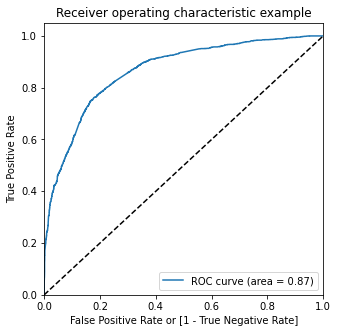

In [96]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

<font color=blue>**The area under the curve of the ROC is 0.87 which seems good. So we seem to have a good model. Let's also check for sensitivity and specificity.**</blue>

## 🏁Finding Optimal Cutoff Point🏁
<hr/>

In [97]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.333241,8003,0,1,1,1,1,0,0,0,0,0,0
1,0,0.090448,218,0,1,0,0,0,0,0,0,0,0,0
2,1,0.074591,4171,0,1,0,0,0,0,0,0,0,0,0
3,1,0.370351,4037,0,1,1,1,1,0,0,0,0,0,0
4,1,0.962558,3660,1,1,1,1,1,1,1,1,1,1,1


In [98]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.571621  0.986505  0.185986
0.2   0.2  0.689307  0.950209  0.446799
0.3   0.3  0.765299  0.898092  0.641869
0.4   0.4  0.787940  0.802699  0.774221
0.5   0.5  0.790406  0.738483  0.838668
0.6   0.6  0.773145  0.667752  0.871107
0.7   0.7  0.739969  0.549558  0.916955
0.8   0.8  0.711275  0.451373  0.952855
0.9   0.9  0.657924  0.308981  0.982266


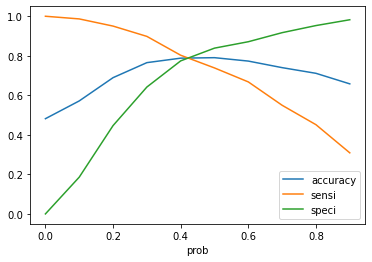

In [99]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<font color=blue>**From the curve above, 0.41 is the optimum point to take it as a cutoff probability.**</blue>

In [100]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.41 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.333241,8003,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.090448,218,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.074591,4171,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.370351,4037,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.962558,3660,1,1,1,1,1,1,1,1,1,1,1,1


In [101]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.788836583725622

In [102]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1811,  501],
       [ 441, 1708]], dtype=int64)

In [103]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [104]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7947882736156352

In [105]:
# Let us calculate specificity
TN / float(TN+FP)

0.7833044982698962

In [106]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.2166955017301038


In [107]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7732005432322318


In [108]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8041740674955595


<font color=blue>**With the current cut off as 0.41 we have accuracy, sensitivity of 79% and specificity of 78%**</blue>

### Precision and Recall
<pre/>

In [109]:
from sklearn.metrics import precision_score, recall_score

In [110]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8096938775510204

In [111]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7384830153559795

### Precision and recall tradeoff
<pre/>

In [112]:
from sklearn.metrics import precision_recall_curve

In [113]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       1
 5       0
 6       0
 7       1
 8       0
 9       1
 10      0
 11      0
 12      1
 13      1
 14      0
 15      1
 16      1
 17      1
 18      1
 19      1
 20      0
 21      0
 22      1
 23      0
 24      0
 25      0
 26      1
 27      0
 28      1
 29      0
 30      0
 31      0
 32      0
 33      0
 34      0
 35      1
 36      0
 37      0
 38      0
 39      1
 40      0
 41      1
 42      0
 43      0
 44      1
 45      0
 46      0
 47      1
 48      0
 49      1
 50      0
 51      0
 52      1
 53      1
 54      1
 55      0
 56      0
 57      0
 58      0
 59      0
 60      0
 61      0
 62      1
 63      0
 64      1
 65      0
 66      0
 67      0
 68      0
 69      0
 70      1
 71      1
 72      1
 73      0
 74      1
 75      0
 76      0
 77      0
 78      1
 79      1
 80      0
 81      0
 82      1
 83      0
 84      1
 85      1
 86      1
 87      1
 88      1
 89      1
 90      0

In [114]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

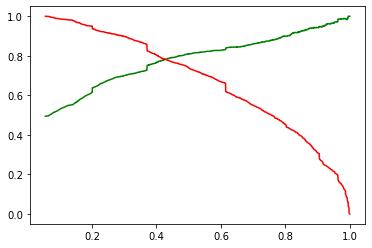

In [115]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## ✨Making predictions on the test set✨
<hr/>

In [116]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [117]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4771,0,-0.943022,0,1,0,0,1,0,0,0,0
6122,0,-0.826165,0,0,0,0,0,0,1,0,0
9202,0,0.733689,0,0,0,0,1,0,1,0,0
6570,1,0.581422,0,0,0,0,1,0,1,0,0
2668,0,0.646932,0,0,0,0,1,0,1,1,0


In [118]:
X_test_sm = sm.add_constant(X_test)

In [119]:
y_test_pred = res.predict(X_test_sm)

In [120]:
y_test_pred[:10]

4771    0.996944
6122    0.155572
9202    0.731474
6570    0.357530
2668    0.514475
4233    0.829741
3368    0.780429
9091    0.490433
5972    0.176890
3631    0.800807
dtype: float64

In [121]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [122]:
# Let's see the head
y_pred_1.head()

,0
4771,0.996944
6122,0.155572
9202,0.731474
6570,0.357530
2668,0.514475


In [123]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [124]:
# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index

In [125]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [126]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [127]:
y_pred_final.head()

,Converted,LeadID,0
0,1,4771,0.996944
1,0,6122,0.155572
2,0,9202,0.731474
3,1,6570,0.357530
4,1,2668,0.514475


In [128]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [129]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,LeadID,Converted_Prob
0,1,4771,0.996944
1,0,6122,0.155572
2,0,9202,0.731474
3,1,6570,0.357530
4,1,2668,0.514475


In [130]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [131]:
y_pred_final.head()

,Converted,LeadID,Converted_Prob,final_predicted
0,1,4771,0.996944,1
1,0,6122,0.155572,0
2,0,9202,0.731474,1
3,1,6570,0.357530,0
4,1,2668,0.514475,1


In [132]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7860878661087866

In [133]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[782, 214],
       [195, 721]], dtype=int64)

In [134]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [135]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.787117903930131

In [136]:
# Let us calculate specificity
TN / float(TN+FP)

0.785140562248996

<font color=blue>**We have accuracy of 78%, sensitivity of around 79% and specificity of 78% for test dataset**</blue>

### Precision and Recall metrics for the test set
<hr/>
<pre/>

In [137]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7711229946524064

In [138]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.787117903930131

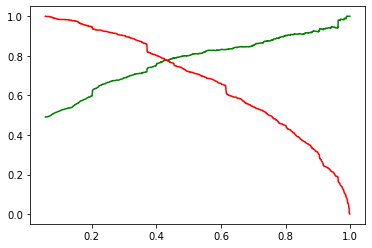

In [139]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# 🔚Conclusion🔚
<hr/>


People spending higher than average time are promising leads, so targeting them and approaching them can be helpful conversions. Landing page submissions can help find out more leads. Marketing management, human resources management has a high conversion rates. People from these specialization can be promising leads. Overall this model proves to be accurate.

**Logistic Regression model**

Train Dataset :
- Accuracy - 78.88%
- Sensitivity - 79.47%
- Specificity - 78.33%

Test Dataset :
- Accuracy - 78.60%
- Sensitivity - 78.71%
- Specificity : 78.51%